C:\Users\Gubier\AppData\Local\Temp\ipykernel_8716\4195585602.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[column].fillna(train[column].mean(), inplace=True)
C:\Users\Gubier\AppData\Local\Temp\ipykernel_8716\4195585602.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000131 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 217
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

d:\Pyt\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:34:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 218, number of negative: 351
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000082 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 196
[LightGBM] [Info] Number of data points in the train set: 569, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383128 -> initscore=-0.476291
[LightGBM] [Info] Start training from score -0.476291
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

d:\Pyt\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:35:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Pyt\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:35:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Pyt\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:35:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Pyt\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:35:14] WARNING: C:\buildkite-agent

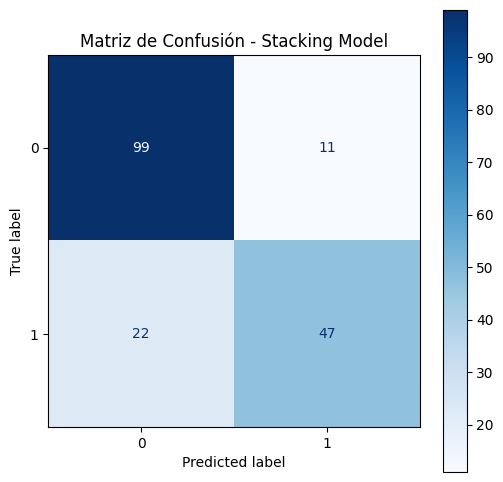

Accuracy del Stacking Model: 0.82


In [34]:
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
import pandas as pd
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

# Cargar el conjunto de datos
train = pd.read_csv('D:\\Ale\\Competitions\\Titanic\\Data\\train.csv')

# 1. Rellenar valores nulos en el conjunto de entrenamiento
for column in train.columns:
    if train[column].dtype == 'object':
        # Para columnas categóricas, usamos la moda
        train[column].fillna(train[column].mode()[0], inplace=True)
    else:
        # Para columnas numéricas, usamos la media
        train[column].fillna(train[column].mean(), inplace=True)

# 2. Crear la característica 'Familia Size'
train['Familia Size'] = train['SibSp'] + train['Parch'] + 1

# 3. Extraer el 'Title' de la columna 'Name'
train['Title'] = train['Name'].apply(lambda x: re.findall(r', (.*?)\.', x)[0])

# Agrupar títulos poco comunes
title_replacements = {
    'Mme': 'Mrs', 'Mlle': 'Miss', 'Ms': 'Miss', 'Countess': 'Rare', 
    'Lady': 'Rare', 'Dr': 'Rare', 'Rev': 'Rare', 'Col': 'Rare', 
    'Major': 'Rare', 'Capt': 'Rare', 'Don': 'Rare', 'Dona': 'Rare'
}

train['Title'] = train['Title'].replace(title_replacements)

# 4. Crear categorías de edad
def categorize_age(age):
    if age <= 5:
        return 'Child'
    elif age <= 12:
        return 'Young'
    elif age <= 18:
        return 'Teenager'
    elif age <= 60:
        return 'Adult'
    else:
        return 'Senior'

train['Age Category'] = train['Age'].apply(categorize_age)

# 5. Binning de 'Fare'
max_fare = train['Fare'].max()  # Obtener el valor máximo de Fare
bins = [0, max_fare / 4, max_fare / 2, 3 * max_fare / 4, float('inf')]
labels = ['Barato', 'Semi Barato', 'Semi Caro', 'Caro']
train['Fare Category'] = pd.cut(train['Fare'], bins=bins, labels=labels, right=False)

# 6. Normalizar los valores de las columnas categóricas
# Convertimos a minúsculas para evitar discrepancias
train['Sex'] = train['Sex'].str.lower()
train['Embarked'] = train['Embarked'].str.lower()
train['Title'] = train['Title'].str.lower()
train['Age Category'] = train['Age Category'].str.lower()
train['Fare Category'] = train['Fare Category'].str.lower()

# 7. Convertir variables categóricas a numéricas usando Label Encoding
le = LabelEncoder()
categorical_cols = ['Sex', 'Embarked', 'Title', 'Age Category', 'Fare Category']

# Ajustar el LabelEncoder solo en el conjunto de entrenamiento
for col in categorical_cols:
    train[col] = le.fit_transform(train[col].astype(str))

# 8. Preparar los datos para el modelo
X = train[['Sex', 'Age', 'Familia Size', 'Fare', 'Embarked', 'Pclass', 'Title', 'Age Category', 'Fare Category']]
y = train['Survived']

# 9. Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 10. Inicializar los modelos
stacking_model = StackingClassifier(
    estimators=[
        ('Random Forest', RandomForestClassifier(random_state=42)),
        ('CatBoost', CatBoostClassifier(silent=True)),
        ('LightGBM', LGBMClassifier()),
        ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
    ],
    final_estimator=RidgeClassifier(),
    cv=5
)

# 11. Entrenar y evaluar el modelo de stacking
stacking_model.fit(X_train, y_train)
y_pred_stacking = stacking_model.predict(X_test)

# Calcular la matriz de confusión y la precisión para el modelo de stacking
conf_matrix_stacking = confusion_matrix(y_test, y_pred_stacking)
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)

# Visualizar la matriz de confusión para el modelo de stacking
plt.figure(figsize=(6, 6))
disp_stacking = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_stacking, display_labels=[0, 1])
disp_stacking.plot(cmap='Blues', ax=plt.gca())
plt.title('Matriz de Confusión - Stacking Model')
plt.show()

# Mostrar la precisión del modelo de stacking
print(f'Accuracy del Stacking Model: {accuracy_stacking:.2f}')

In [35]:
# Cargar el conjunto de prueba
test_data = pd.read_csv('D:\\Ale\\Competitions\\Titanic\\Data\\test.csv')

# 1. Rellenar valores nulos en el conjunto de prueba
for column in test_data.columns:
    if test_data[column].dtype == 'object':
        test_data[column].fillna(test_data[column].mode()[0], inplace=True)
    else:
        test_data[column].fillna(test_data[column].mean(), inplace=True)

# 2. Crear la característica 'Familia Size'
test_data['Familia Size'] = test_data['SibSp'] + test_data['Parch'] + 1

# 3. Extraer el 'Title' de la columna 'Name'
test_data['Title'] = test_data['Name'].apply(lambda x: re.findall(r', (.*?)\.', x)[0])

# Agrupar títulos poco comunes
test_data['Title'] = test_data['Title'].replace(title_replacements)

# 4. Crear categorías de edad
test_data['Age Category'] = test_data['Age'].apply(categorize_age)

# 5. Binning de 'Fare'
max_fare = test_data['Fare'].max()  # Encontrar el máximo valor de Fare
bins = [0, max_fare / 4, max_fare / 2, 3 * max_fare / 4, max_fare]  # Dividir en 4 bins
labels = ['Low', 'Medium', 'High', 'Very High']  # Etiquetas para los bins
test_data['Fare Category'] = pd.cut(test_data['Fare'], bins=bins, labels=labels, right=False)

# 6. Normalizar los valores de las columnas categóricas antes de aplicar Label Encoding
test_data['Sex'] = test_data['Sex'].str.lower()
test_data['Embarked'] = test_data['Embarked'].str.lower()
test_data['Title'] = test_data['Title'].str.lower()
test_data['Age Category'] = test_data['Age Category'].str.lower()
test_data['Fare Category'] = test_data['Fare Category'].str.lower()

# 7. Convertir variables categóricas a numéricas usando Label Encoding
# Transformar el conjunto de prueba
for col in categorical_cols:
    # Manejar el caso de categorías no vistas
    if test_data[col].isin(le.classes_).all():
        test_data[col] = le.transform(test_data[col].astype(str))
    else:
        # Si hay categorías no vistas, codificar solo las que sí están
        test_data[col] = le.fit_transform(test_data[col].astype(str))

# 8. Preparar los datos del conjunto de prueba para el modelo
X_test_final = test_data[['Sex', 'Age', 'Familia Size', 'Fare', 'Embarked', 'Pclass', 'Title', 'Age Category', 'Fare Category']]

# 9. Hacer predicciones sobre el conjunto de test
y_test_pred = stacking_model.predict(X_test_final)

# 10. Crear el archivo de submission
submission = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': y_test_pred})
submission.to_csv('D:\\Ale\\Competitions\\Titanic\\Data\\submission.csv', index=False)

C:\Users\Gubier\AppData\Local\Temp\ipykernel_8716\1703435482.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data[column].fillna(test_data[column].mean(), inplace=True)
C:\Users\Gubier\AppData\Local\Temp\ipykernel_8716\1703435482.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 